In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the dataset
data = pd.read_csv('data/synth_data.csv')
data.head()

,age,domain,current_job,degree,cs_bg,experience,avg_time,holidays,week_back,city,...,tailwind,docker,nest,nodejs,cnn,mongoose,hasura,graphql,django,jquery
0,22,Web Development with Django,MERN Stack developer,Degree,No,No,12.2,Yes,6,Bangalore,...,0,0,0,0,0,0,0,0,0,0
1,23,MEAN Stack,React Developer,Degree,Yes,No,9.7,Yes,2,Bangalore,...,0,0,0,0,0,0,0,0,1,0
2,24,Flutter,Flutter development,Diploma,No,No,10.8,Yes,3,Trivandrum,...,0,0,0,0,0,0,0,0,0,0
3,24,Web Development with Django,MERN Stack developer,No Degree,No,No,7.0,Yes,7,Manjeri,...,0,0,0,0,0,0,0,0,0,0
4,19,MERN Stack,MERN Stack developer,Degree,No,No,12.7,Yes,3,Manjeri,...,1,0,0,0,0,0,0,0,0,1


In [3]:
data.shape

(10000, 55)

There are 1000 datapoints with 57 features

In [4]:
print(list(data.columns))

['age', 'domain', 'current_job', 'degree', 'cs_bg', 'experience', 'avg_time', 'holidays', 'week_back', 'city', 'graduated', 'salary', 'mui', 'redux', 'flutter', 'node', 'jest', 'sql', 'dart', 'linux', 'bootstrap', 'typescipt', 'vim', 'mysql', 'opencv', 'communication', 'aws', 'react', 'api', 'ajax', 'express', 'jwt', 'javascript', 'git', 'typescript', 'nginx', 'tailwindcss', 'vercel', 'python', 'mongodb', 'firebase', 'postman', 'angular', 'next', 'html', 'tailwind', 'docker', 'nest', 'nodejs', 'cnn', 'mongoose', 'hasura', 'graphql', 'django', 'jquery']


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            10000 non-null  int64  
 1   domain         10000 non-null  object 
 2   current_job    10000 non-null  object 
 3   degree         10000 non-null  object 
 4   cs_bg          10000 non-null  object 
 5   experience     10000 non-null  object 
 6   avg_time       10000 non-null  float64
 7   holidays       10000 non-null  object 
 8   week_back      10000 non-null  int64  
 9   city           10000 non-null  object 
 10  graduated      10000 non-null  object 
 11  salary         10000 non-null  float64
 12  mui            10000 non-null  int64  
 13  redux          10000 non-null  int64  
 14  flutter        10000 non-null  int64  
 15  node           10000 non-null  int64  
 16  jest           10000 non-null  int64  
 17  sql            10000 non-null  int64  
 18  dart   

Every column seems to have correct datatype

## Descriptive Statistics

In [6]:
# Descriptive Statistics for variables
data.iloc[:, :12].describe().T

,count,mean,std,min,25%,50%,75%,max
age,10000.0,22.94800,2.823667,19.0,21.0,23.0,25.0,31.0
avg_time,10000.0,12.00105,2.891216,7.0,9.7,12.0,14.6,16.0
week_back,10000.0,4.91140,2.143084,0.0,3.0,5.0,7.0,7.0
salary,10000.0,5.51561,1.443959,2.4,4.5,5.6,6.6,9.0


* There are no missing values
* Average Salary is 5.5 LPA
* Students age ranges from 19 to 31 and median is 23, which means most of the students are fresh graduates
* Students spent about 12 hr/d on office while some with max value 16 hr/d and min value 7 hr/d
* There are no students with 0 week back and 7 is the maximum week back one got while 0 is the least one. On average students get 5 week back
* Largest salary One student got is 9 LPA while 2.4 LPA is the minimum

### Data Cleaning

In [7]:
# Checking for Null values
data.isnull().sum()

age              0
domain           0
current_job      0
degree           0
cs_bg            0
experience       0
avg_time         0
holidays         0
week_back        0
city             0
graduated        0
salary           0
mui              0
redux            0
flutter          0
node             0
jest             0
sql              0
dart             0
linux            0
bootstrap        0
typescipt        0
vim              0
mysql            0
opencv           0
communication    0
aws              0
react            0
api              0
ajax             0
express          0
jwt              0
javascript       0
git              0
typescript       0
nginx            0
tailwindcss      0
vercel           0
python           0
mongodb          0
firebase         0
postman          0
angular          0
next             0
html             0
tailwind         0
docker           0
nest             0
nodejs           0
cnn              0
mongoose         0
hasura           0
graphql     

In [8]:
# Checking for duplicate values
data.duplicated().sum()

0

There are no null values or duplicate values

## Univariate Analysis
#### Distributions of Features and Target

In [9]:
# Seperating Categorical varialbes and Numerical variables
cat_cols = [col for col in data.columns if data[col].dtype == 'object']

num_cols = [col for col in data.columns if data[col].dtype in ['int64', 'float64'] and col != 'salary']

In [10]:
print("Categorical features: ", cat_cols)
print("\nNumerical features: ", num_cols)

Categorical features:  ['domain', 'current_job', 'degree', 'cs_bg', 'experience', 'holidays', 'city', 'graduated']

Numerical features:  ['age', 'avg_time', 'week_back', 'mui', 'redux', 'flutter', 'node', 'jest', 'sql', 'dart', 'linux', 'bootstrap', 'typescipt', 'vim', 'mysql', 'opencv', 'communication', 'aws', 'react', 'api', 'ajax', 'express', 'jwt', 'javascript', 'git', 'typescript', 'nginx', 'tailwindcss', 'vercel', 'python', 'mongodb', 'firebase', 'postman', 'angular', 'next', 'html', 'tailwind', 'docker', 'nest', 'nodejs', 'cnn', 'mongoose', 'hasura', 'graphql', 'django', 'jquery']


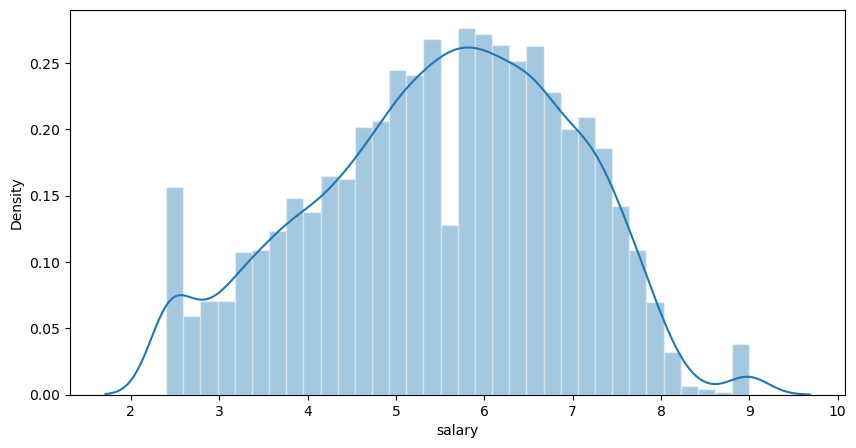

In [11]:
# Distribution of salary
plt.figure(figsize=(10, 5))
sns.histplot(data["salary"], kde=True, stat="density", kde_kws=dict(cut=3),alpha=.4, edgecolor=(1, 1, 1, .4),)
plt.show()

* The target varialbe `salary` follows somewhat normal distribution
* The increased height in the start suggests there are some students who get placed at lower salaries, may be they are those who doesn't complete the program?
* Comparativley lower height of bin near mean suggests that only few students accepted the salary around 5.5 LPA rather than, 5 and 6, may due to number of real datapoints is 30.
* There is slight increase in number of people chose salary close to 9 LPA over 8-9 lpa, these students can be those who has most skills

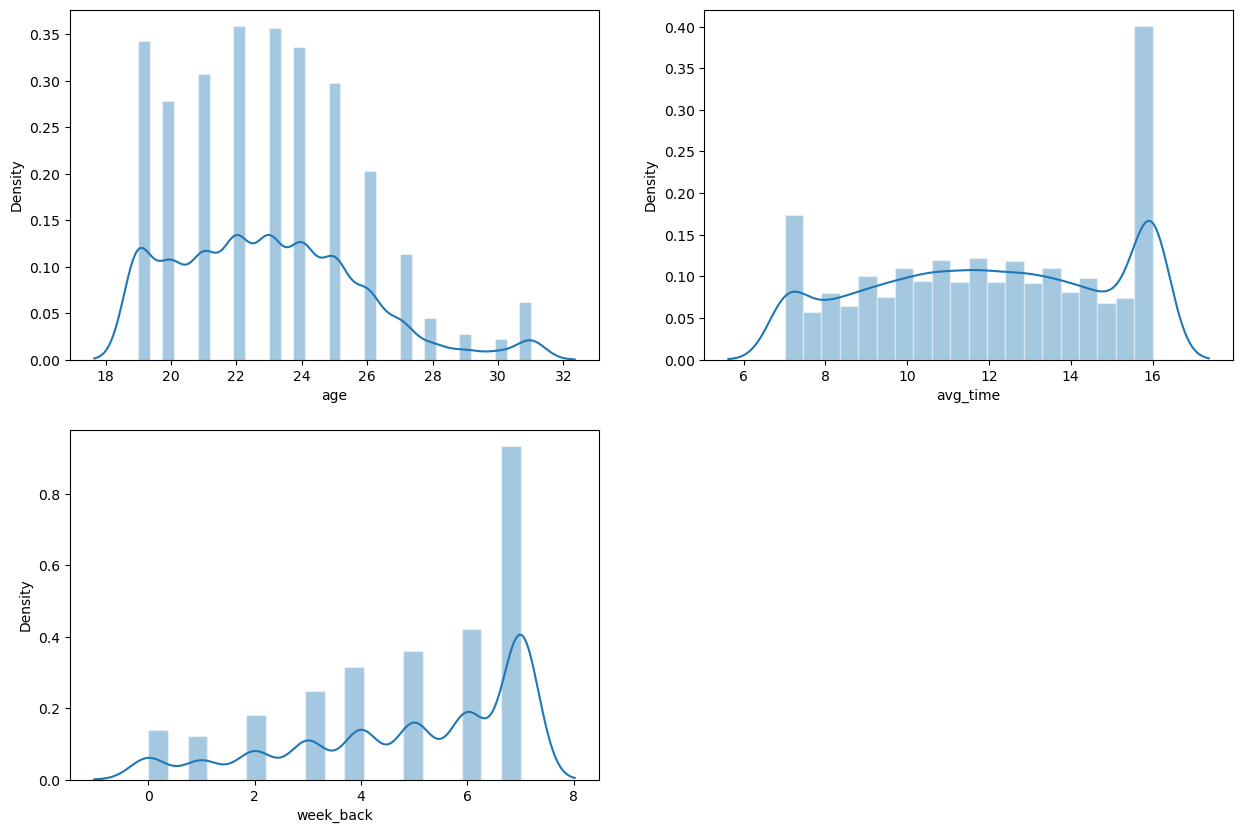

In [12]:
# Distributions of numerical features
num_feat = num_cols[:3]

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_feat, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[col], kde=True, stat="density", kde_kws=dict(cut=3),alpha=.4, edgecolor=(1, 1, 1, .4),)
    
    
plt.show()

#### Age
* The age follows right skewed distribution which suggest that most of the sutdent are of young age who are below 24 years old.
* Peak in 18-19 yrs age shows that a significant amount of +2 students have got placed
* Compartively lower number of graduates have age greater than 26, this may be due to most of students in Brototype are either college graduates/dropouts and joined after +2

#### Averge time spent in office
* avg_time follows bimodal distribution
* A large number of students spend about 16hr in office while the next largest group spend about 7 hr/d (they may be coming from home) and rest follows a normal disribution

#### Week backs recieved
* Number of week back recieved by students follow negative skewd distribution
* Maximum number of students recieved 7 week backs while small group of students recieved 0 week backs

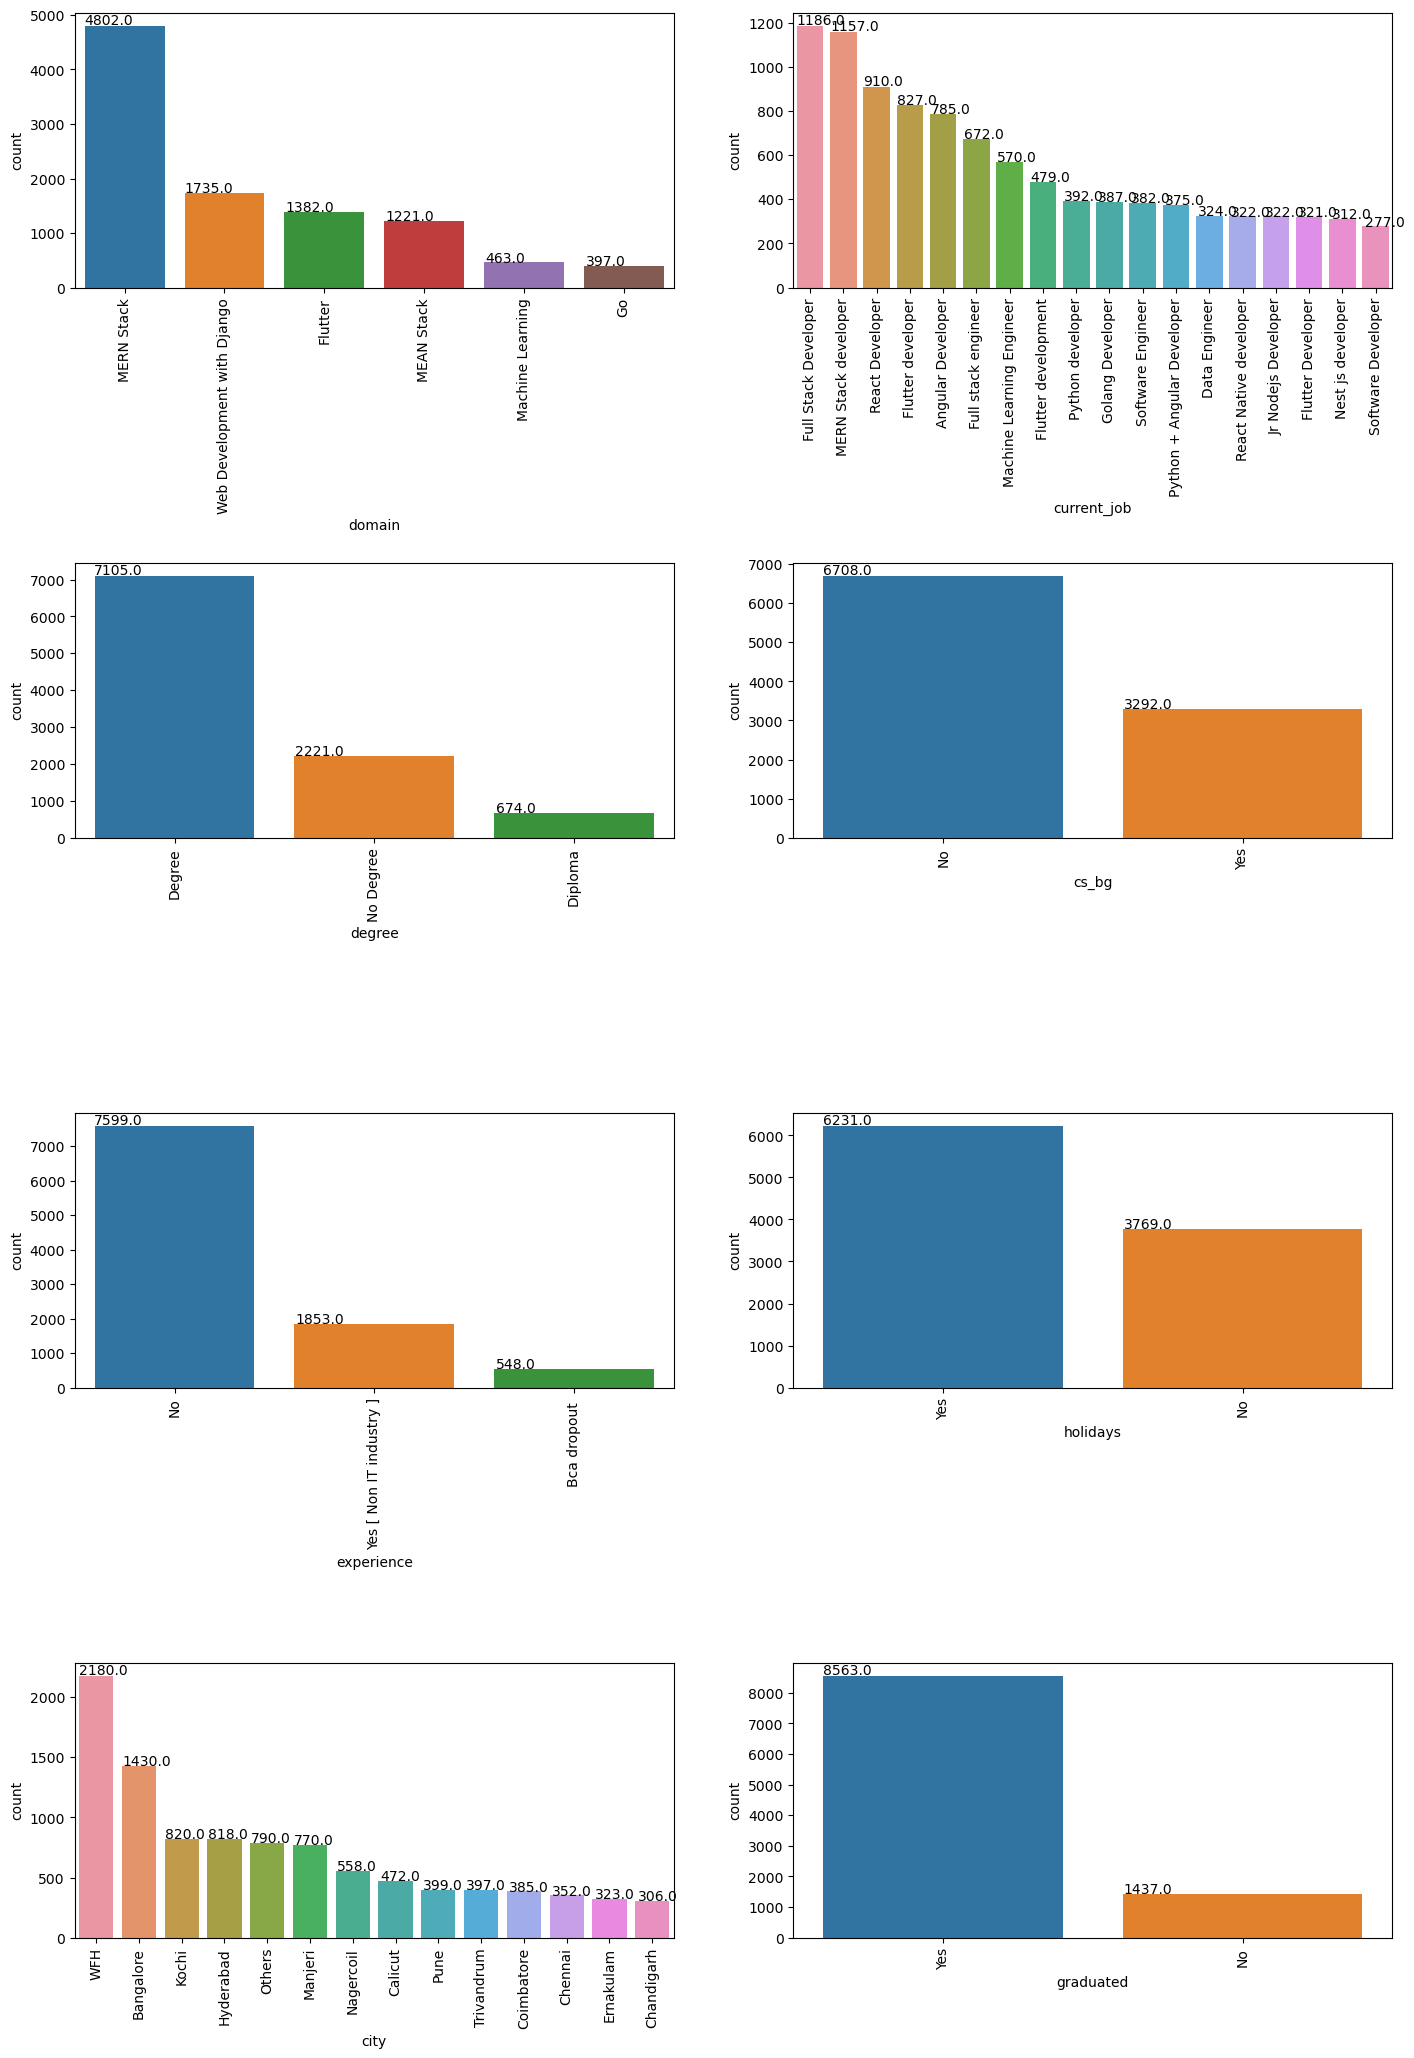

In [13]:
# Distributions of Categorical features
plt.figure(figsize=(17, 25))

for i,col in enumerate(cat_cols, 1):
    plt.subplot(4, 2, i)
    plt.subplots_adjust(hspace=1)
    
    ax = sns.countplot(data=data, x=col, order= data[col].value_counts().index)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

    for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x() * 1.005, p.get_height() * 1.005))

#### Domain chosen in Brototype
* Maximum number of students chose MERN Stack (4802) - 48%
* Least number of students chose ML and Go respectively

#### Used office in holdays?
* More number utilized office in holday while half the amount didn't

#### Experience before joining Brototype
* 76% didn't have any work experience before joining Brototype
* 18.5% Students had some industrial experience other than IT while a few has some experience in IT domain (0.5%)

#### Computer Science Background
* 67% Students are from non CS Background while rest has some CS connection

#### Degree?
* Maximum number of students graduated has degree background - 71%
* 22% didn't hold any degree
* 0.6% holds diploma

#### Currently working at?
* 21% students has work from home job which is the highest
* More number of placements are in Bangalore - 14.3%
* Rest of the cities has similar number of jobs

#### 6 months completed?
* 85.6% Students have completed the program while rest got placed before 6 months

In [14]:

skills_list = list(data.iloc[:, 12:].columns)
print(skills_list)

def count_students(skills):
    result = {}
    for skill in skills_list:
        students_count = data[skill].sum()
        result[skill] = students_count
        
    return result

['mui', 'redux', 'flutter', 'node', 'jest', 'sql', 'dart', 'linux', 'bootstrap', 'typescipt', 'vim', 'mysql', 'opencv', 'communication', 'aws', 'react', 'api', 'ajax', 'express', 'jwt', 'javascript', 'git', 'typescript', 'nginx', 'tailwindcss', 'vercel', 'python', 'mongodb', 'firebase', 'postman', 'angular', 'next', 'html', 'tailwind', 'docker', 'nest', 'nodejs', 'cnn', 'mongoose', 'hasura', 'graphql', 'django', 'jquery']


In [15]:
# Creating dataframe for skills
skills_dict = count_students(skills_list)

skills_df = pd.DataFrame.from_dict(skills_dict, orient='index', columns=['count'])
skills_df.reset_index(inplace=True)
skills_df = skills_df.rename(columns={'index': 'skill'})
skills_df.head()

,skill,count
0,mui,360
1,redux,223
2,flutter,134
3,node,5097
4,jest,19


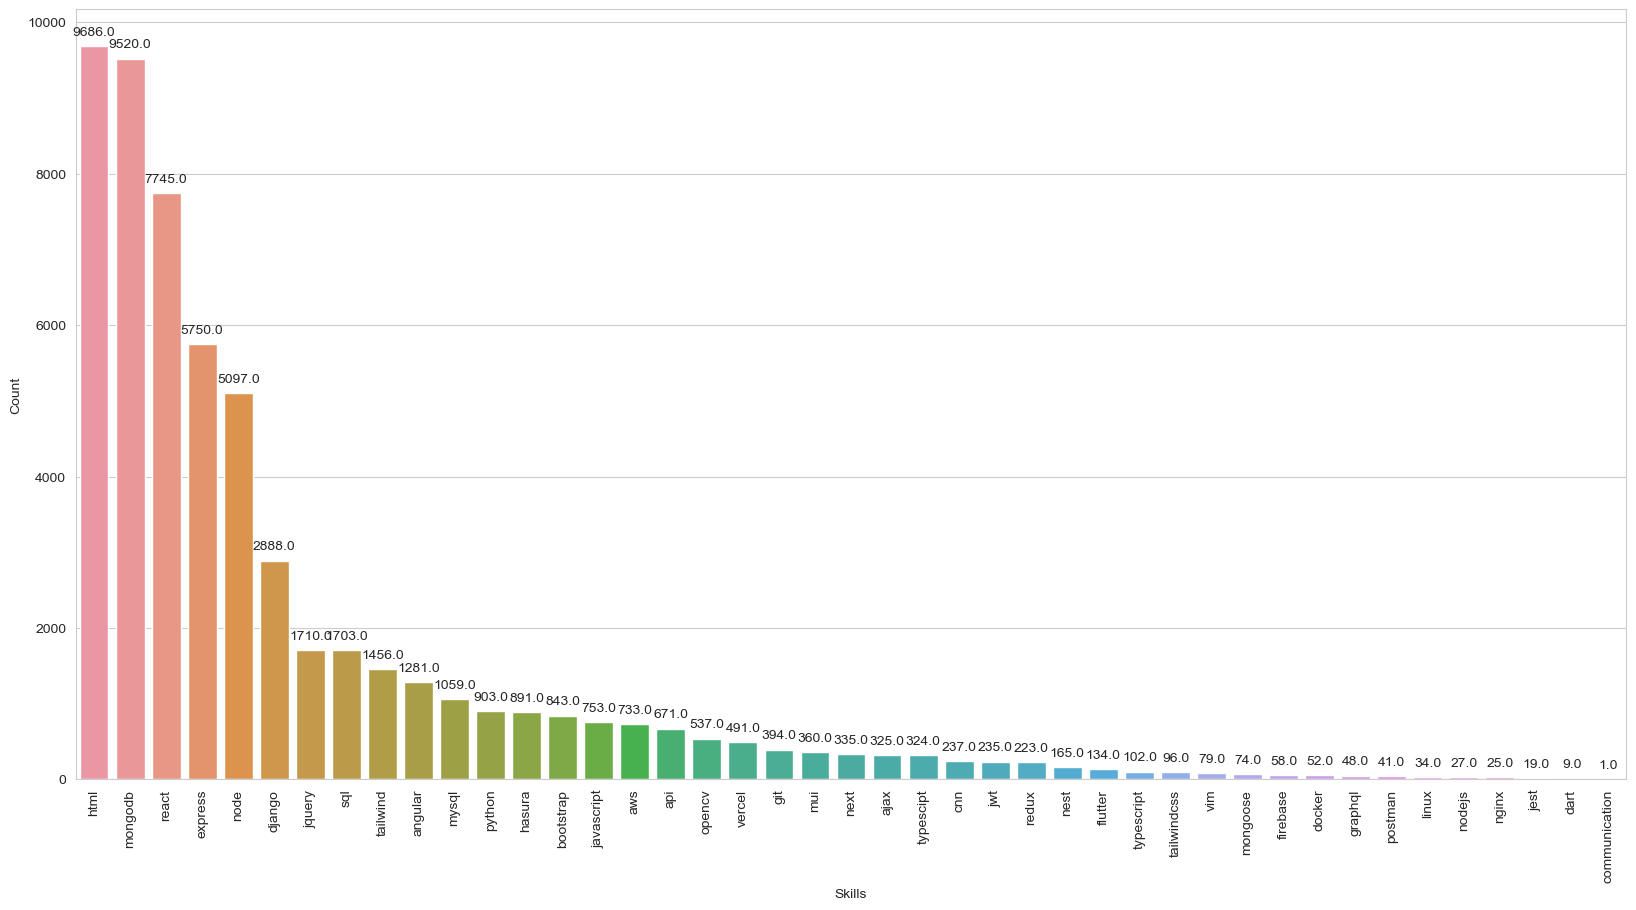

In [16]:
# Plotting bar graph for skills
skills_df = skills_df.sort_values(by='count', ascending=False)

# Plot the bar chart
plt.figure(figsize=(20, 10))
sns.set_style("whitegrid")
ax = sns.barplot(x='skill', y='count', data=skills_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Annotate the counts on top of the bars
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Add x-axis and y-axis labels
plt.xlabel('Skills')
plt.ylabel('Count')
plt.show()

* 96.9% Students knows html - obvious as first 2 weeks are common to all students
* 95.2 studends knows mongodb
* 88.07% students have added the skill go - is this an error?
* 77.45% students has studied react (Most number of students studied MERN Stack)
* Express, Mongodb, and node are known by 50%-60% students

## Bivariate Analysis

In [17]:
data.iloc[:, :12].head()

,age,domain,current_job,degree,cs_bg,experience,avg_time,holidays,week_back,city,graduated,salary
0,22,Web Development with Django,MERN Stack developer,Degree,No,No,12.2,Yes,6,Bangalore,Yes,6.1
1,23,MEAN Stack,React Developer,Degree,Yes,No,9.7,Yes,2,Bangalore,Yes,7.4
2,24,Flutter,Flutter development,Diploma,No,No,10.8,Yes,3,Trivandrum,No,4.5
3,24,Web Development with Django,MERN Stack developer,No Degree,No,No,7.0,Yes,7,Manjeri,Yes,8.0
4,19,MERN Stack,MERN Stack developer,Degree,No,No,12.7,Yes,3,Manjeri,Yes,2.6


* ### Scatter Plots
    - Exploring the relationship between "salary" and continuous variables

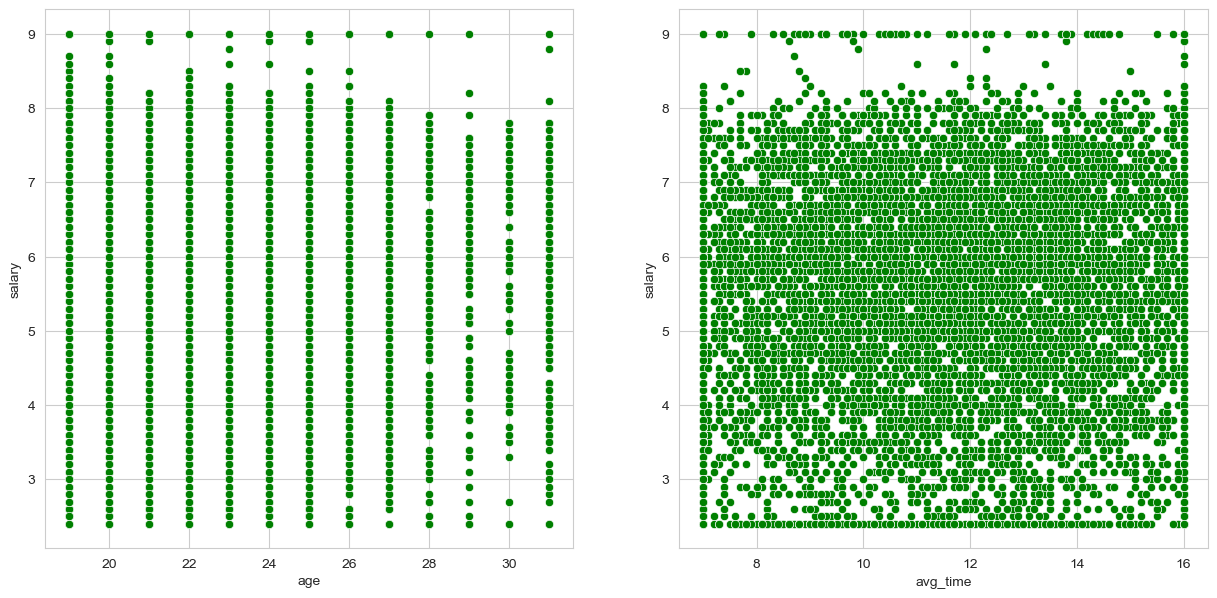

In [24]:
continous_cols = ['age', 'avg_time']

plt.figure(figsize=(15, 7))
for idx, col in enumerate(continous_cols, 1):
    plt.subplot(1, 2, idx)
    sns.scatterplot(data=data, x=col, y='salary',  color='green')

# Show the plot
plt.show()

* Points are filled in almost areas - Shows no clear linear relationship between these variables.
* This means that there is no significant correlation between "age" or "avg_time" and "salary".

* ### Box Plots
    - Exploring the relationship between "salary" and categorical variables

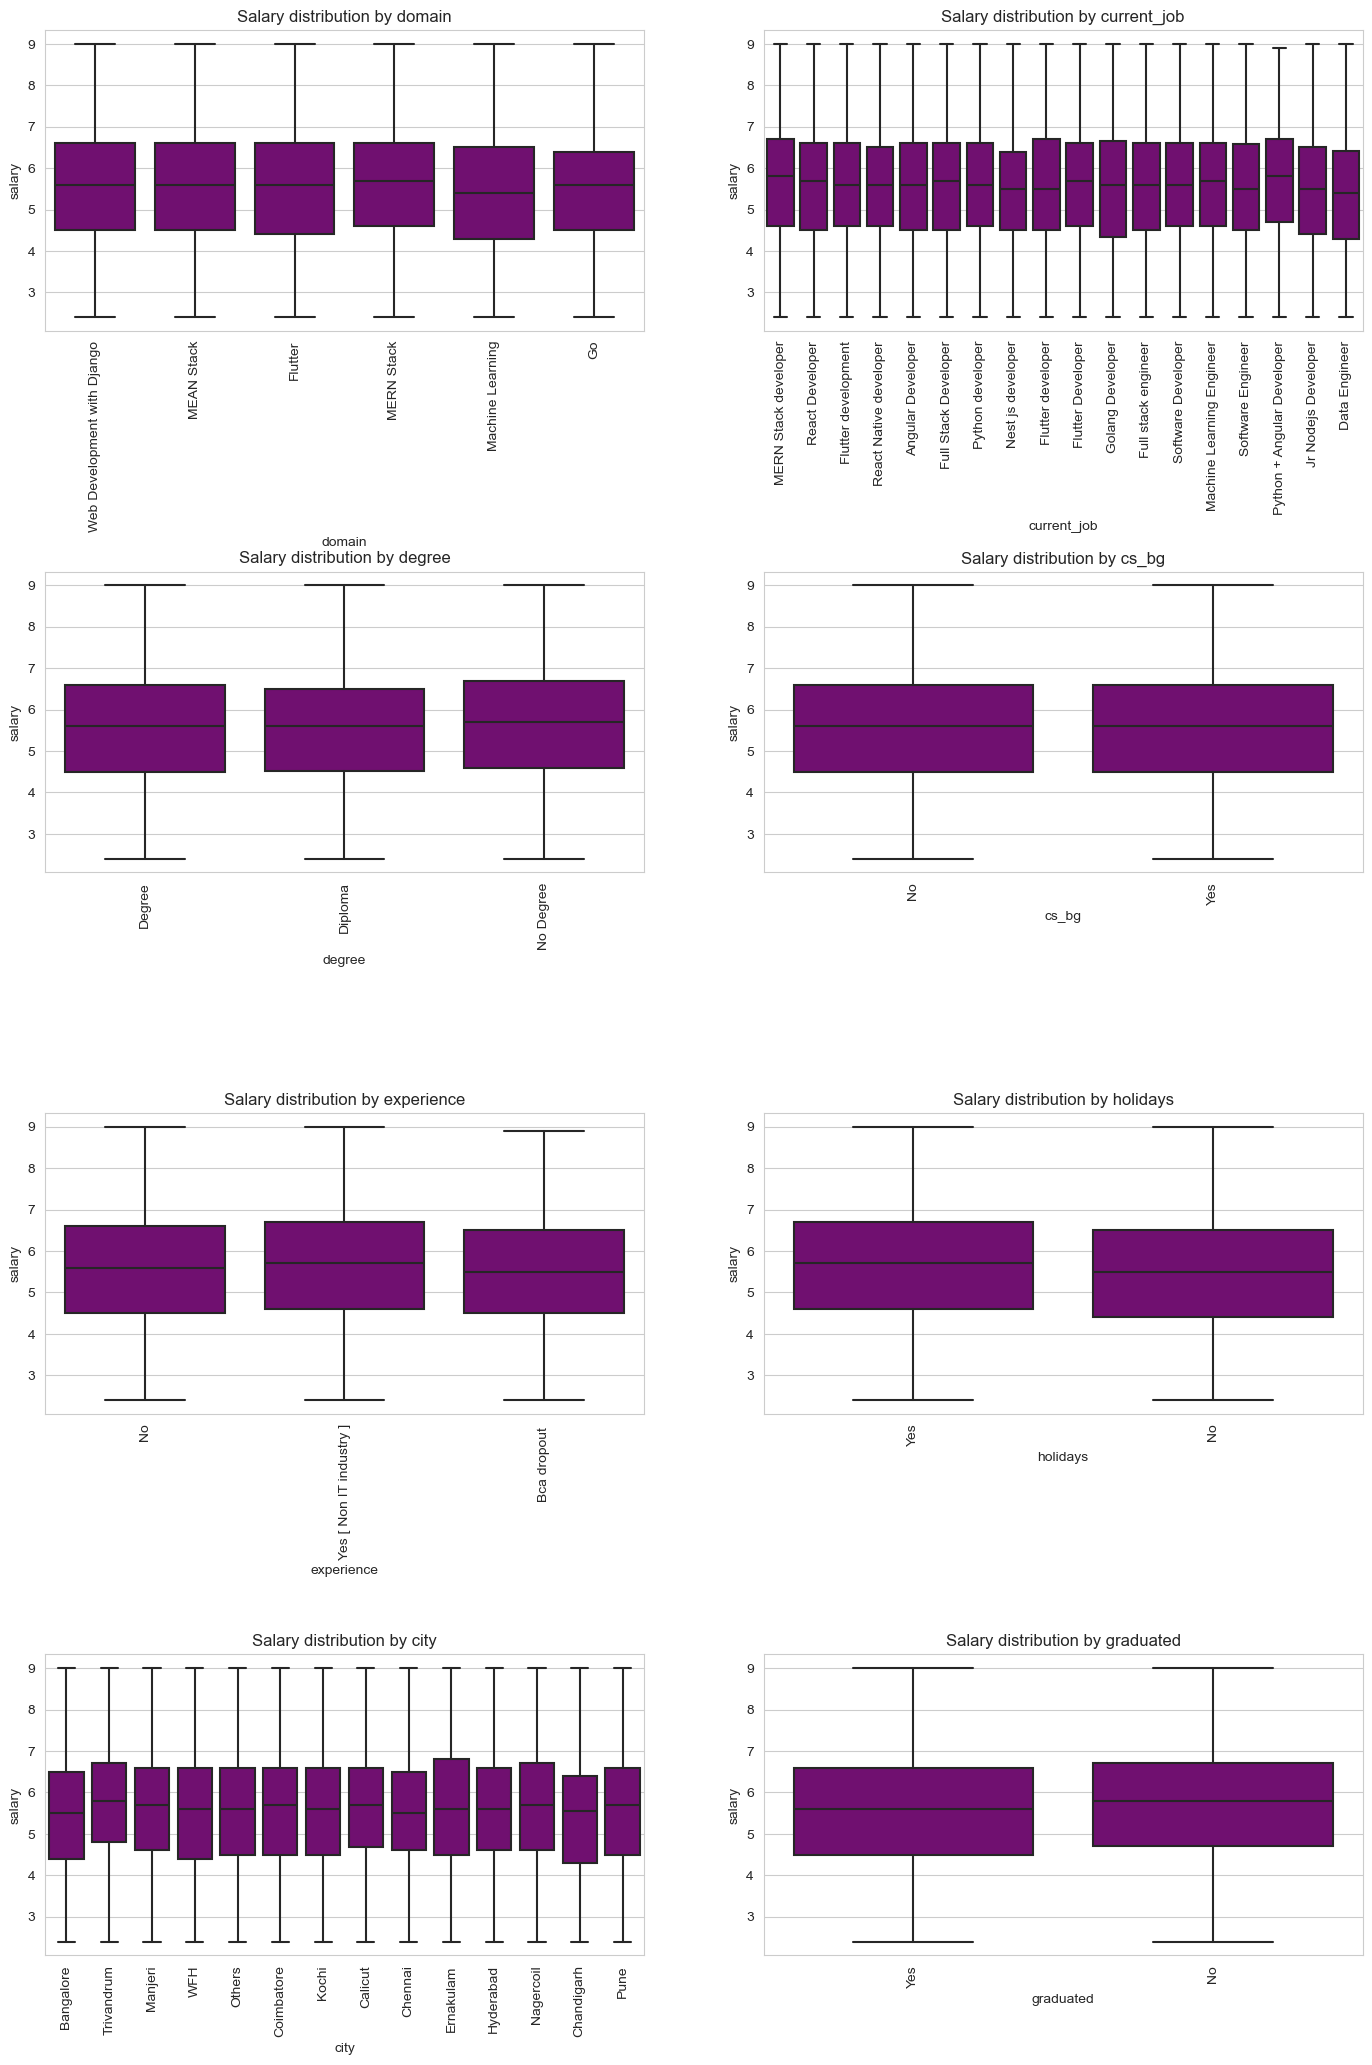

In [33]:
plt.figure(figsize=(17, 25))

for i,col in enumerate(cat_cols, 1):
    plt.subplot(4, 2, i)
    plt.subplots_adjust(hspace=0.8)

    ax = sns.boxplot(x=col, y='salary', data=data, color='purple')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    
    plt.title(f'Salary distribution by {col}')

* Distribution of the target variable "salary" is consistent across all the categories for the colums "domain, degree, cs_bg, experience, holidays and graduted" - These variables may not have a significant impact on the salary